## Rubik's Cube Representation

A standard rubik's cube has 6 faces with 3x3 squares. Each face can be represented using a numpy array, with the ordering 
$$(front, up, down, left, right, top, bottom)$$
Each cube operation rotates one face $\pm90^\circ$. One way to do this is to use quaternions to define rotations in 3-dimensional space.

In [280]:
from Cube import RubiksCube
%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%autoreload 2

In [3]:
import numpy as np

In [358]:
c = RubiksCube()


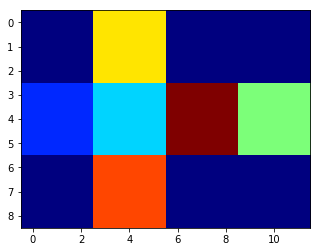

In [359]:
c.show_layout()

In [353]:
c.cube=new_rotate(c.cube,0,1,1)

In [345]:
def new_rotate(ar,index,axis,d):
    rot = False
    if axis == 0:
        if index == 0:
            face_ix = 1
            rot = True
        elif index == ar.shape[1]-1:
            face_ix = 2
            rot = True
        #horizontal
        ix = [0,3,5,4]
        sides = np.vstack(ar[ix]).T
        sides[index] = np.roll(sides[index],d*3)
        ar[ix] = np.vsplit(sides.T,4)
    elif axis == 1:
        if index == 0:
            face_ix = 3
            rot = True
        elif index == ar.shape[1]-1:
            face_ix = 4
        #vertical
        ix = [0,1,5,2]   
        sides = np.hstack(ar[ix])
        sides[index] = np.roll(sides[index],d*3)
        ar[ix] = np.hsplit(sides,4)
        
    if rot: ar[face_ix] = np.rot90(ar[face_ix],k=d)
    return ar
       
    

In [309]:
%prun [new_rotate(a,0,1,1) for x in range(10000)]

In [294]:
%prun [c.rotate_cube("F",-1) for x in range(10000)]

In [218]:
?np.vsplit

In [183]:
np.hstack(a[[0,1,2,5]])

array([[1, 1, 1, 2, 2, 2, 3, 3, 3, 6, 6, 6],
       [1, 1, 1, 2, 2, 2, 3, 3, 3, 6, 6, 6],
       [1, 1, 1, 2, 2, 2, 3, 3, 3, 6, 6, 6]], dtype=int8)

In [179]:
??np.rollaxis

In [141]:
new_rotate(a,0,0,-1)

[[1 4 4 4 5 5 5 6 6 6 1 1]
 [6 1 1 1 4 4 4 5 5 5 6 6]
 [6 1 1 1 4 4 4 5 5 5 6 6]]
[[[1 6 6]
  [4 1 1]
  [4 1 1]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]]

 [[4 1 1]
  [5 4 4]
  [5 4 4]]

 [[5 4 4]
  [6 5 5]
  [6 5 5]]

 [[6 5 5]
  [1 6 6]
  [1 6 6]]]


In [11]:
np.ix_((0,3),(0,3))

(array([[0],
        [3]]), array([[0, 3]]))

In [8]:
a[0:3,0:3]

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [33]:
np.vectorize(c.colourdict.get)([0,1,0])

(array([100,   0, 100]), array([  0, 100,   0]), array([0, 0, 0]))

In [29]:
?np.vectorize

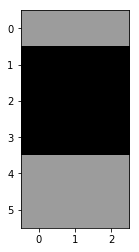

In [139]:
plt.imshow(c.__rep__()[0])

In [77]:
print(c.cube)
c.rotate_cube("F",1)
print(c.cube)
c.rotate_cube("F",-1)
print(c.cube)

[[['R' 'R' 'R']
  ['R' 'R' 'R']
  ['R' 'R' 'R']]

 [['G' 'G' 'G']
  ['G' 'G' 'G']
  ['G' 'G' 'G']]

 [['B' 'B' 'B']
  ['B' 'B' 'B']
  ['B' 'B' 'B']]

 [['Y' 'Y' 'Y']
  ['Y' 'Y' 'Y']
  ['Y' 'Y' 'Y']]

 [['O' 'O' 'O']
  ['O' 'O' 'O']
  ['O' 'O' 'O']]

 [['W' 'W' 'W']
  ['W' 'W' 'W']
  ['W' 'W' 'W']]]
[[['R' 'R' 'R']
  ['R' 'R' 'R']
  ['R' 'R' 'R']]

 [['G' 'G' 'G']
  ['G' 'G' 'G']
  ['O' 'O' 'O']]

 [['B' 'B' 'Y']
  ['B' 'B' 'Y']
  ['B' 'B' 'Y']]

 [['Y' 'Y' 'Y']
  ['Y' 'Y' 'Y']
  ['G' 'G' 'G']]

 [['B' 'O' 'O']
  ['B' 'O' 'O']
  ['B' 'O' 'O']]

 [['W' 'W' 'W']
  ['W' 'W' 'W']
  ['W' 'W' 'W']]]
[[['R' 'R' 'R']
  ['R' 'R' 'R']
  ['R' 'R' 'R']]

 [['G' 'G' 'G']
  ['G' 'G' 'G']
  ['G' 'G' 'G']]

 [['B' 'B' 'B']
  ['B' 'B' 'B']
  ['B' 'B' 'B']]

 [['Y' 'Y' 'Y']
  ['Y' 'Y' 'Y']
  ['Y' 'Y' 'Y']]

 [['O' 'O' 'O']
  ['O' 'O' 'O']
  ['O' 'O' 'O']]

 [['W' 'W' 'W']
  ['W' 'W' 'W']
  ['W' 'W' 'W']]]


In [41]:
list(c.get_adjacent_squares("F"))

[array(['G', 'G', 'G'], 
       dtype='<U1'), array(['O', 'O', 'O'], 
       dtype='<U1'), array(['B', 'B', 'B'], 
       dtype='<U1'), array(['Y', 'Y', 'Y'], 
       dtype='<U1')]

In [81]:
npimg.

In [9]:
plt.

In [43]:
a = [(1,2,3),(3,4,5)]
for i,(x,y,z) in enumerate(a):
    print(i,x,y,z)

0 1 2 3
1 3 4 5


In [36]:
np.rot90??

In [10]:
?np.ix_